In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

In [2]:
corte_classes = [84, 85, 96, 84, 97, 94, 81, 100, 83, 95, 83, 83, 81, 92, 95, 81, 85, 92, 84, 83, 86, 89, 83, 92, 93, 92, 83, 83, 87, 
                100, 92, 80, 84, 87, 91, 84, 100, 81, 100, 100, 88, 100, 81, 90, 100, 83, 90, 81, 86, 83, 96, 82, 97, 85, 90, 81, 81, 97,
                95, 97, 84, 81, 84, 89, 86, 89, 83, 95]
ordem_classes = ['área_eletricamente_inativa',
       'Bloqueio_de_ramo_direito', 'Bloqueio_de_ramo_esquerdo',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_intraventricular_inespecífico',
       'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
       'Sobrecarga_ventricular_esquerda_(critérios_de_voltagem)',
       'Fibrilação_atrial', 'Flutter_atrial',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_II',
       'Bloqueio_atrioventricular_2:1', 'Bloqueio_atrioventricular_avançado',
       'Bloqueio_atrioventricular_total',
       'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
       'Sistema_de_estimulação_cardíaca_normofuncionante',
       'Sistema_de_estimulação_cardíaca_com_disfunção',
       'Taquicardia_atrial_multifocal', 'Taquicardia_atrial',
       'Taquicardia_supraventricular', 'Corrente_de_lesão_subendocárdica',
       'Alterações_primárias_da_repolarização_ventricular',
       'Extrassístoles_supraventriculares', 'Extrassístoles_ventriculares',
       'Bradicardia_sinusal',
       'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
       'Alterações_da_repolarização_ventricular_atribuídas_à_ação_digitálica',
       'Alterações_inespecíficas_da_repolarização_ventricular',
       'Alterações_secundárias_da_repolarização_ventricular',
       'Arritmia_sinusal',
       'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
       'Interferência_na_linha_de_base_que_não_impede_a_análise_do_ECG',
       'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
       'Traçado_com_qualidade_técnica_insuficiente',
       'Possível_inversão_de_posicionamento_de_eletrodos',
       'Baixa_voltagem_em_derivações_precordiais',
       'Baixa_voltagem_em_derivações_periféricas',
       'Bloqueio_atrioventricular_de_1°_grau',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Desvio_do_eixo_do_QRS_para_direita',
       'Desvio_do_eixo_do_QRS_para_esquerda',
       'Dissociação_atrioventricular_isorrítmica',
       'Distúrbio_de_condução_do_ramo_direito',
       'Distúrbio_de_condução_do_ramo_esquerdo', 'Intervalo_PR_curto',
       'Intervalo_QT_prolongado', 'Isquemia_subendocárdica',
       'Progressão_lenta_de_R_nas_derivações_precordiais', 'Pausa_sinusal',
       'Corrente_de_lesão_subepicárdica',
       'Corrente_de_lesão_subepicárdica_-_provável_infarto_agudo_do_miocárdio_com_supradesnivelamento_de_ST',
       'Repolarização_precoce', 'Ritmo_atrial_ectópico',
       'Ritmo_atrial_multifocal', 'Ritmo_idioventricular_acelerado',
       'Ritmo_juncional', 'Síndrome_de_Brugada', 'Sobrecarga_atrial_direita',
       'Sobrecarga_atrial_esquerda', 'Sobrecarga_biatrial',
       'Sobrecarga_biventricular', 'Sobrecarga_ventricular_direita',
       'Sobrecarga_ventricular_esquerda(_critérios_de_voltagem)',
       'Taquicardia_sinusal', 'Taquicardia_ventricular_não_sustentada',
       'Taquicardia_ventricular_sustentada',
       'Suspeita_de_Síndrome_de_Brugada_repetir_V1-V2_em_derivações_superiores',
       'Taquicardia_juncional', 'Batimento_de_escape_atrial',
       'Batimento_de_escape_supraventricular', 'Batimento_de_escape_juncional',
       'Batimento_de_escape_ventricular']

In [3]:
n_classes = 74
y_test    = np.load("../../test_data/y_test.npy")
y_score   = np.load("../../test_data/y_score.npy")

In [6]:
y_train = np.load("../../../data/training_data/training_data_y.npy")
y_test = y_train[-50000:]

In [9]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
threshold = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold[i] = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

In [43]:
greenZoneIds = pd.read_csv("../../../data/greenZoneIds.csv")

In [44]:
len(greenZoneIds)

2370430

In [37]:
text = pd.read_csv("../../../data/DATA_LAUDOS_TEXTO_formato1", sep = ";")

In [40]:
text = text[text["ID_EXAME"].isin(greenZoneIds['id'])]

In [41]:
len(text)

2370430

In [36]:
y_test[4]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
list(text)[4]

'TRACADO COM MUITA INTERFERENCIA. FAVOR REPETIR EXAME.O TRACADO IMPRESSO CORRESPONDE A APENAS UM TRECHO DO REGISTRO ELETROCARDIOGRAFICO. ESTE LAUDO FOI ELABORADO UTILIZANDO-SE TODO O TRACADO, DISPONIVEL NO SISTEMA. DRA. DENISE IASBECK CRM-MG: 21520 MINAS TELECARDIO - HC-UFU]]> </CONTEUDO></LAUDO>'

In [23]:
y_test[:,2][:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [24]:
y_score[4]

array([3.51193918e-08, 9.92512832e-06, 9.99849558e-01, 8.39087466e-10,
       2.59121231e-11, 2.93727331e-09, 6.02516301e-11, 4.23162021e-08,
       3.40913756e-12, 1.16215176e-10, 2.49759779e-11, 1.30268074e-10,
       1.21154779e-11, 5.06376274e-09, 4.82483351e-08, 2.59315813e-09,
       2.44481362e-11, 3.39963778e-12, 3.53323239e-11, 4.59579930e-08,
       3.44549029e-08, 4.04944384e-10, 1.16142292e-04, 2.11403130e-05,
       3.40403053e-12, 1.25986388e-10, 9.89427030e-12, 1.35875979e-07,
       8.33793191e-12, 3.44619320e-12, 8.66842275e-12, 3.26043858e-12,
       3.22258236e-12, 9.25231571e-13, 3.31872594e-12, 8.48655261e-12,
       3.00103410e-12, 1.52618111e-06, 1.02118973e-10, 6.04684203e-07,
       1.19868848e-09, 8.36770757e-12, 4.63613965e-08, 1.10429053e-08,
       9.07993458e-10, 3.30087857e-07, 4.39021299e-08, 4.10047635e-10,
       5.15204546e-10, 1.51784932e-10, 3.31078524e-12, 4.63913144e-11,
       2.17246124e-10, 3.05918103e-11, 4.96758711e-11, 3.35907604e-12,
      

In [17]:
print(np.shape(threshold[1]))
for a in threshold[1]:
    print(a)

1.9999995
(2830,)
0.9999995
(2830,)
0.99999917
(2830,)
0.99999905
(2830,)
0.99999714
(2830,)
0.9999968
(2830,)
0.99999607
(2830,)
0.9999957
(2830,)
0.9999956
(2830,)
0.99999547
(2830,)
0.99999475
(2830,)
0.9999943
(2830,)
0.99999416
(2830,)
0.9999937
(2830,)
0.99999344
(2830,)
0.9999933
(2830,)
0.9999931
(2830,)
0.99999297
(2830,)
0.9999925
(2830,)
0.99999213
(2830,)
0.9999919
(2830,)
0.9999918
(2830,)
0.99999154
(2830,)
0.9999914
(2830,)
0.9999913
(2830,)
0.9999912
(2830,)
0.99999106
(2830,)
0.99999094
(2830,)
0.9999908
(2830,)
0.9999907
(2830,)
0.9999906
(2830,)
0.99999046
(2830,)
0.99999034
(2830,)
0.9999902
(2830,)
0.9999901
(2830,)
0.99999
(2830,)
0.99998987
(2830,)
0.99998975
(2830,)
0.9999896
(2830,)
0.9999895
(2830,)
0.9999894
(2830,)
0.9999893
(2830,)
0.99998915
(2830,)
0.99998903
(2830,)
0.9999889
(2830,)
0.9999888
(2830,)
0.9999887
(2830,)
0.99998856
(2830,)
0.99998844
(2830,)
0.9999883
(2830,)
0.9999882
(2830,)
0.9999881
(2830,)
0.99998796
(2830,)
0.99998784
(2830,)
0.99998

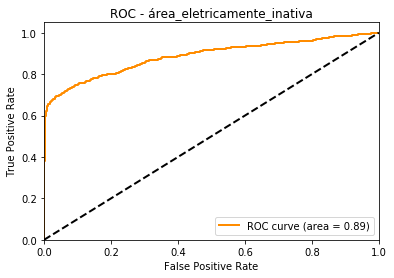

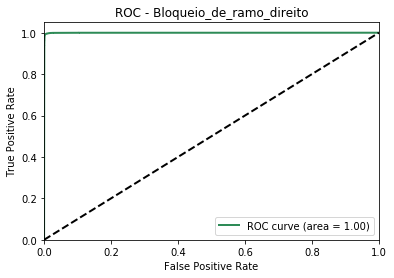

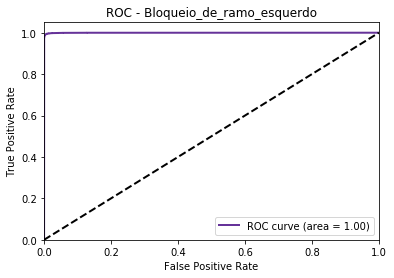

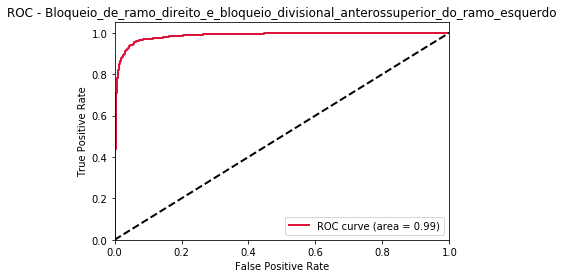

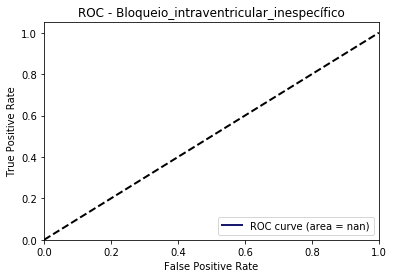

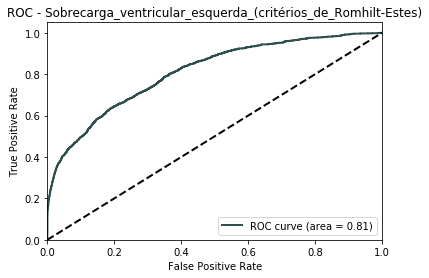

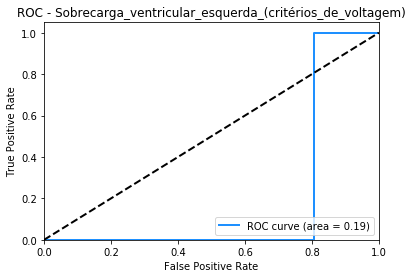

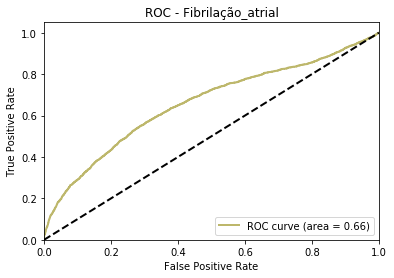

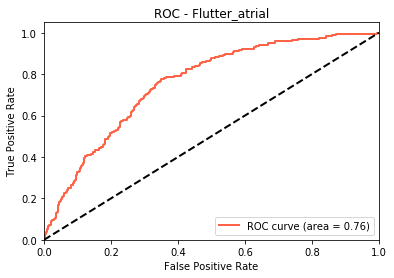

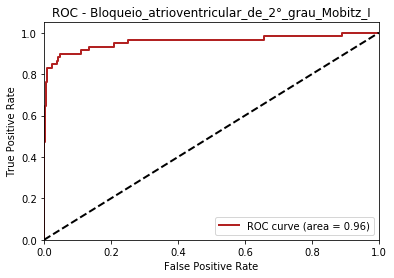

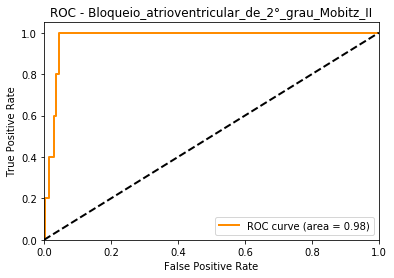

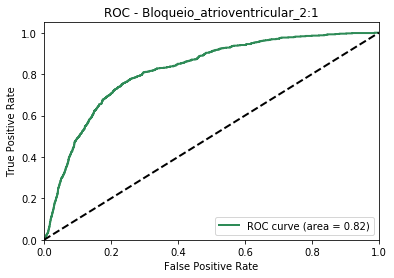

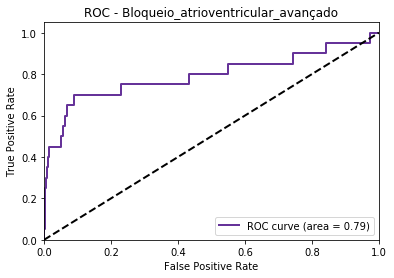

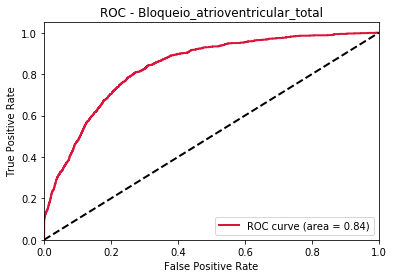

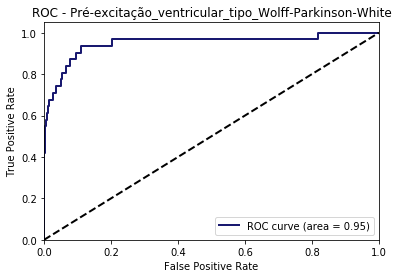

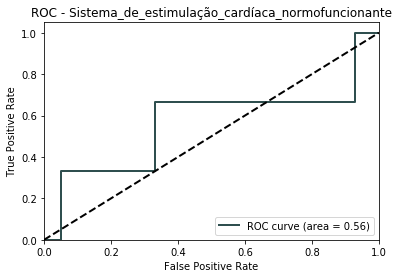

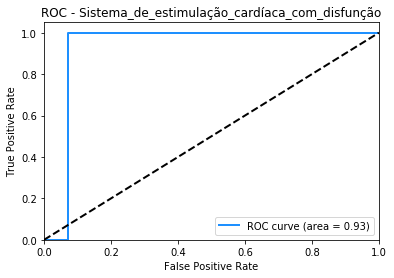

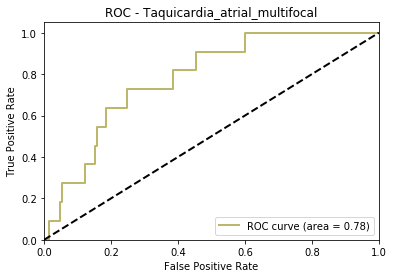

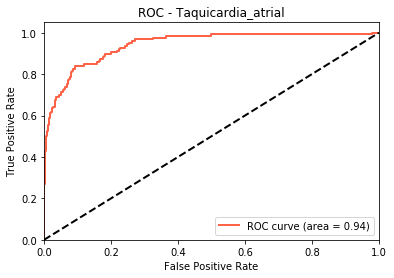

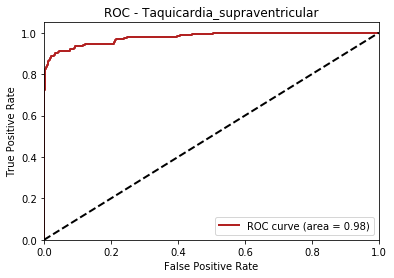

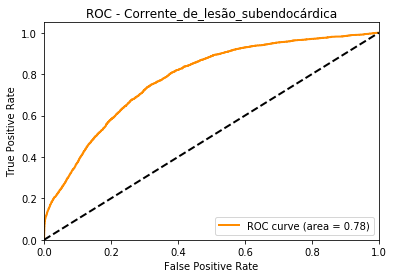

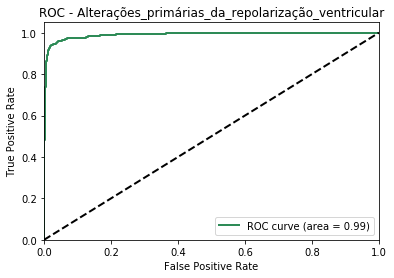

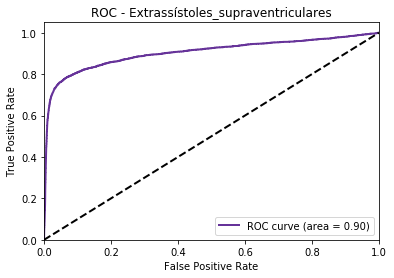

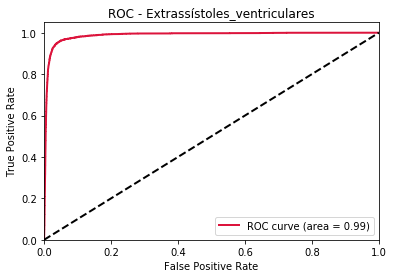

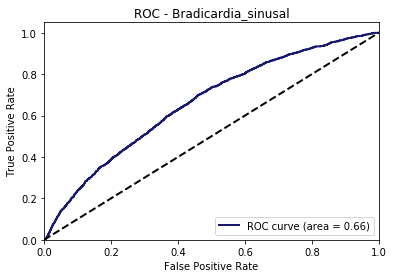

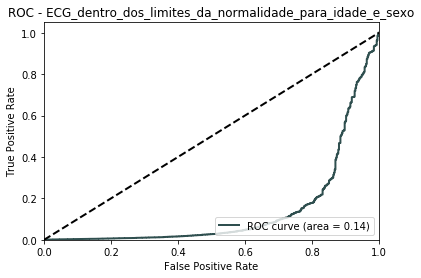

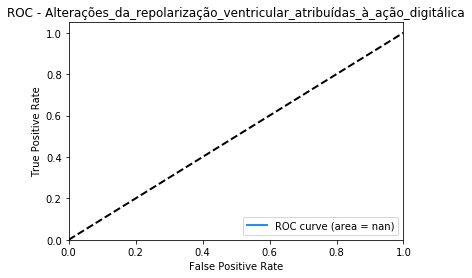

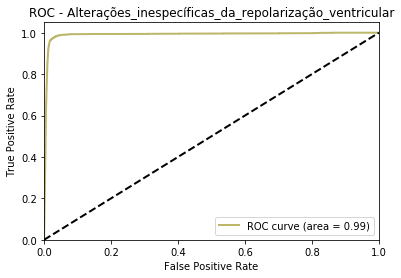

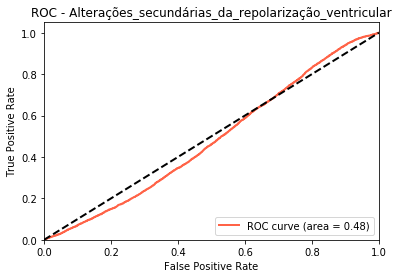

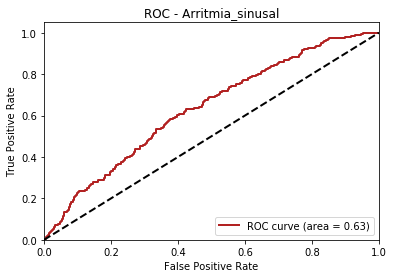

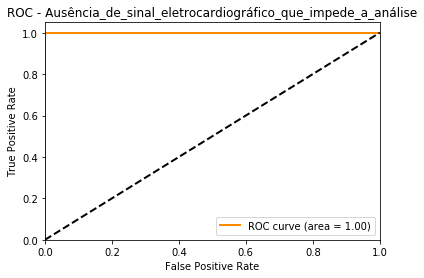

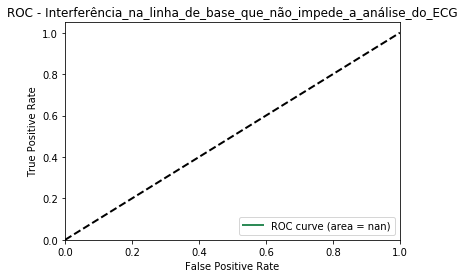

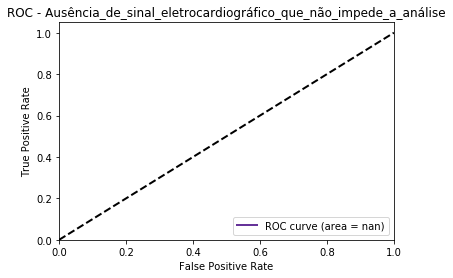

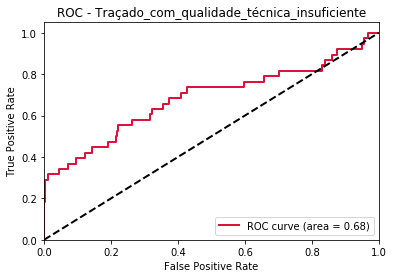

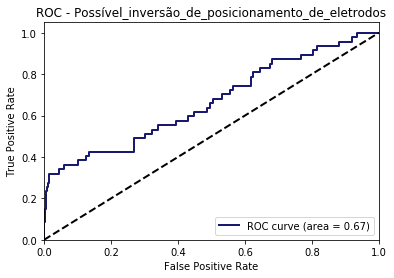

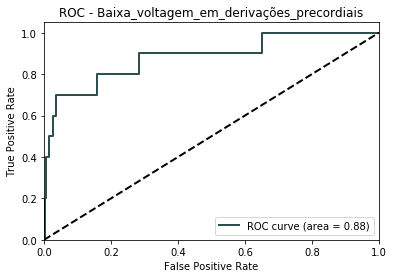

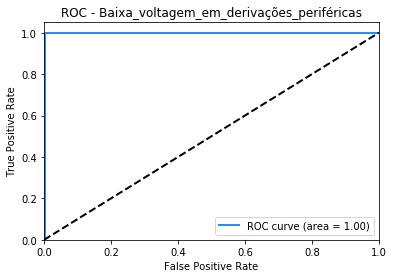

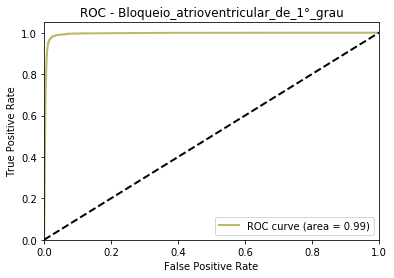

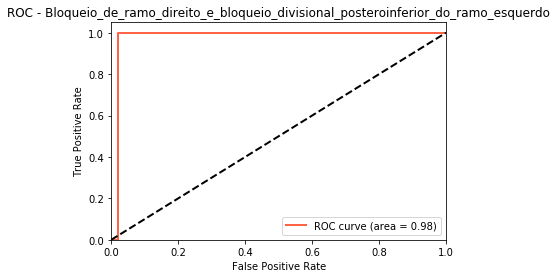

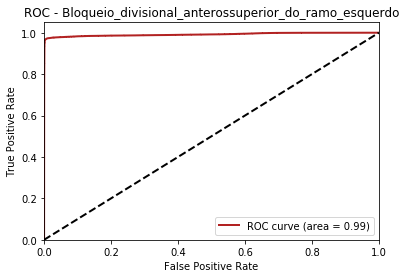

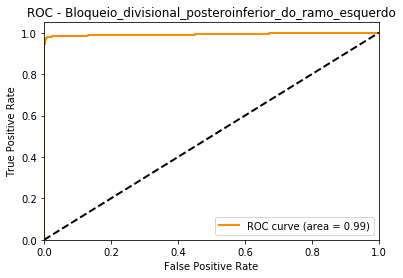

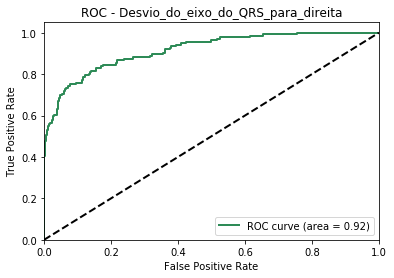

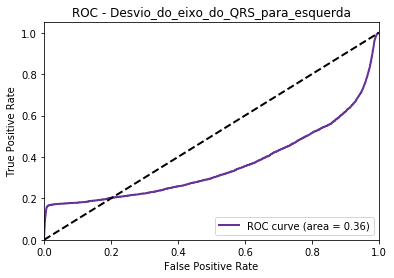

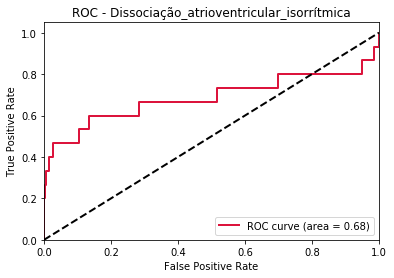

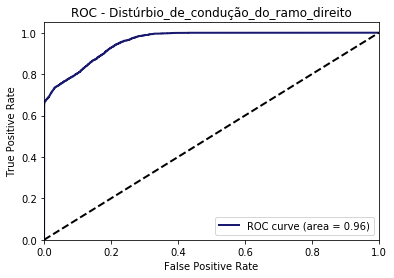

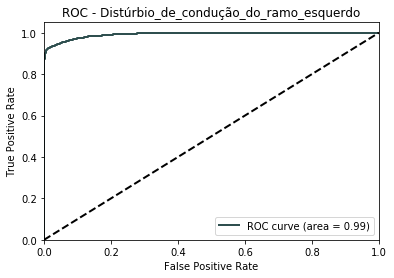

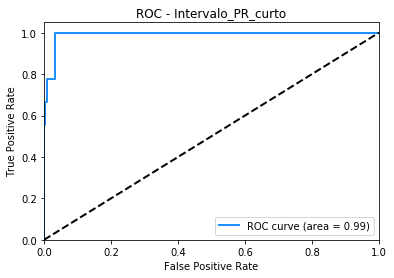

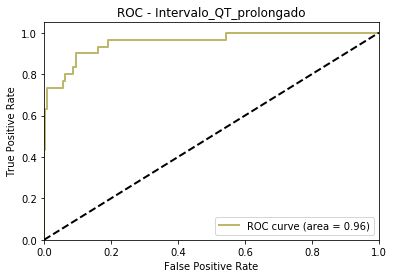

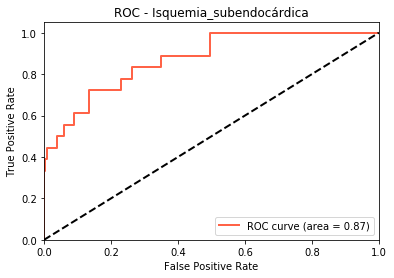

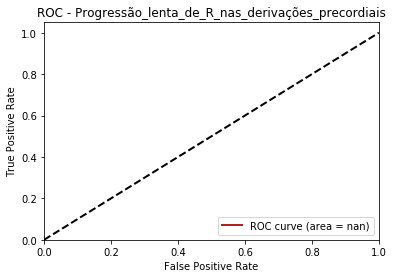

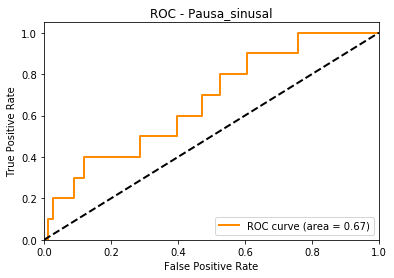

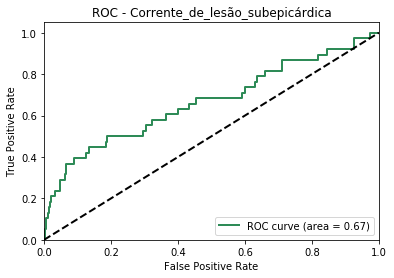

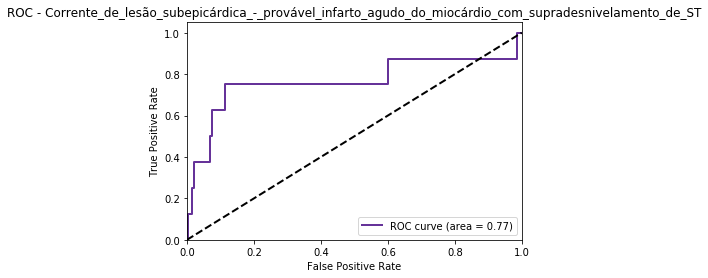

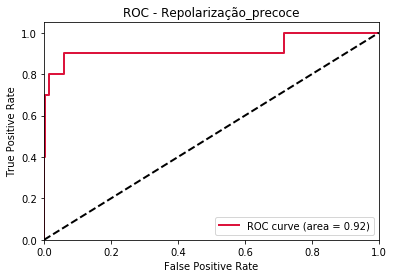

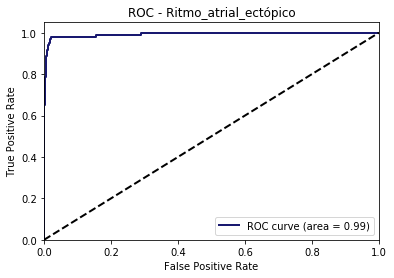

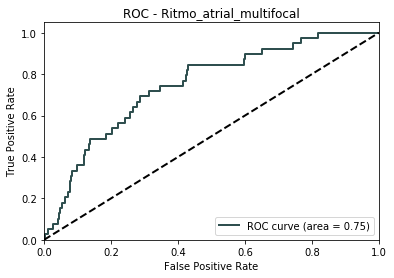

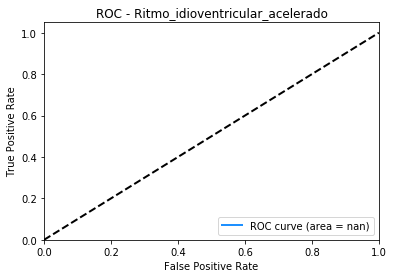

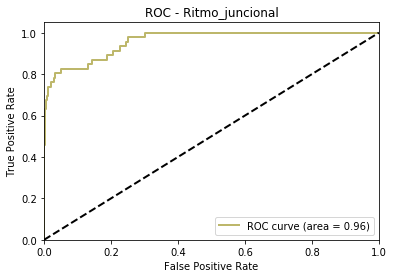

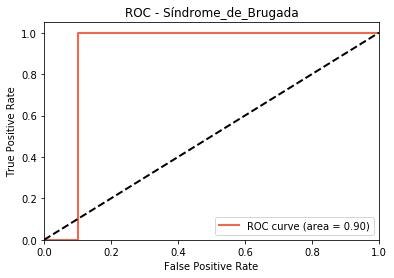

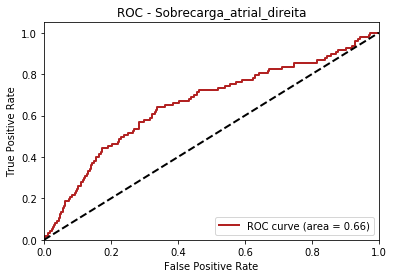

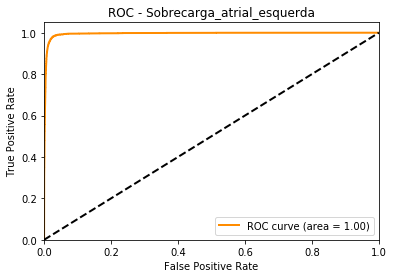

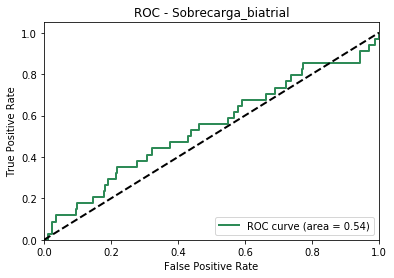

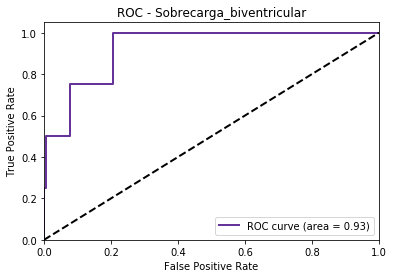

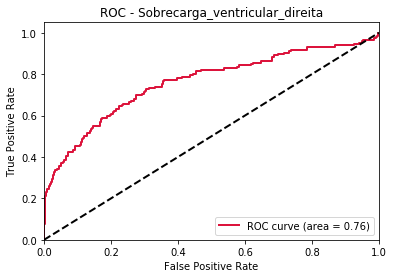

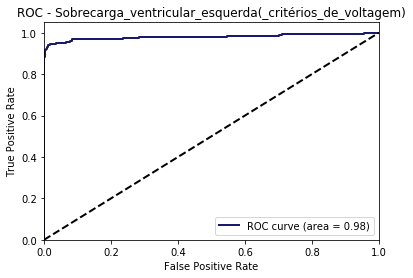

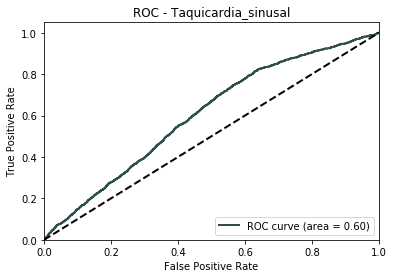

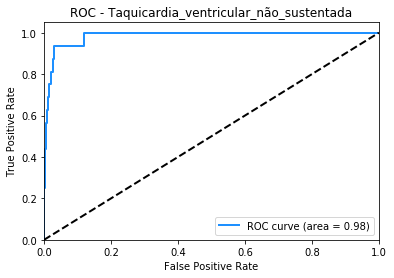

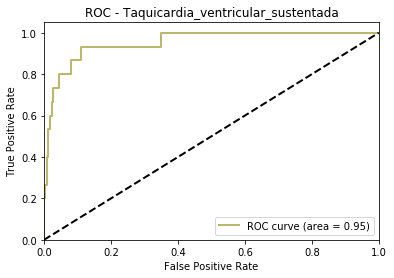

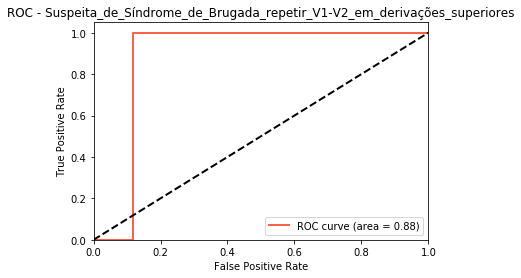

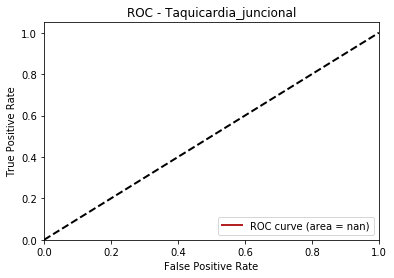

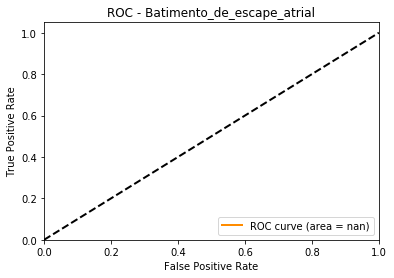

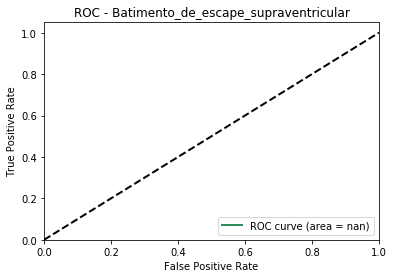

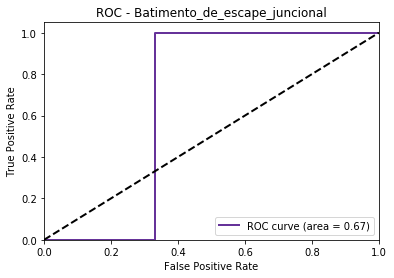

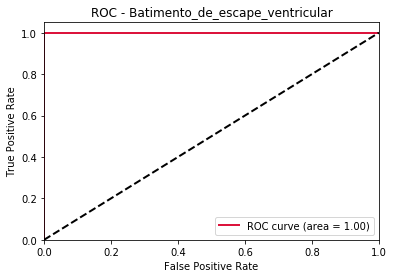

In [81]:
colors = ["darkorange","seagreen","rebeccapurple","crimson","midnightblue","darkslategrey","dodgerblue","darkkhaki","tomato","firebrick"]
for nClass in range(74):
    plt.figure()
    lw = 2
    plt.plot(fpr[nClass], tpr[nClass], color = colors[nClass%10],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nClass])
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + ordem_classes[nClass])
    plt.legend(loc="lower right")
    plt.savefig('../../../data/graficos/ROC/' + ordem_classes[nClass] + '.png')
    plt.show()